### Pix2Pix
Code 참조: <a href="https://www.tensorflow.org/tutorials/generative/pix2pix">Tensorflow pix2pix</a><br>
논문 참조: <a href="https://arxiv.org/pdf/1611.07004.pdf">Image-to-Image Translation with Conditional Adversarial Networks</a><br>

Pix2Pix가 뭔지에 대해서 자세히 알아보기 전에 먼저 Pix2Pix의 결과부터 살펴보자.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/1.png" height="100%" width="100%" /></div><br>

Pix2Pix란 Conditional Adversarial Network를 이용하여 Image-to-Image Model이다.  
이러한 Pix2Pix는 GAN과 같은 Image한개로서 학습하는 것이 아닌 Paired Image로서 학습을 진행하게 된다.  
이러한 Pix2Pix Model이 이전 Model과의 차이점을 논문에서는 이렇게 표현하고 있다.  
>This makes it possible to apply the same generic approach to problems that traditionally would require very different loss formulations.

위의 인용 구문과 같이 이러한 Pix2Pix의 가장 중요한 것은 **Loss Function을 어떻게 구성하였냐 이다.**  

<br><br>

### 기존 Model의 문제점
Image-to-Image Model은 Pix2Pix가 나오기 전부터 존재 하였다. 이러한 대표적인 Image-to-Image Model에서 문제점은 무엇이고 어떻게 Pix2Pix에서는 해결하였는지 살펴보자.  
<br>

#### **<a href="https://wjddyd66.github.io/keras/Keras(6)/#vae">Unet</a>**  
위의 링크는 Segmentation을 하기 위하여 U-Net을 사용하여 Model을 구성하고 알아보았다.(물론 결과는 좋지 않았었다...)  
많은 CNN의 Model들과 같이 LossFunction을 다음과 같이 정의하였다.  
<p>$$E = \sum(y-(\hat{y}+w_{c}(x)))^2$$</p>

위의 LossFunction을 살펴보게 되면 MSE로서 구성한 것을 알 수 있다.  
해당 논문에서는 **이러한 LossFunction은 Blur효과를 일으킨다고 설명하였다.**  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/2.png" height="100%" width="100%" /></div><br>
위의 사진에서 왼쪽의 그림이 L1 Loss Function을 사용했을 때의 결과이다.  
해당 논문에서는 이유를 다음과 같이 설명하였다.  

>If we take a naive approach and ask the CNN to minimize the Euclidean distance between predicted and ground truth pixels, it will tend to produce blurry results [43, 62]. 
This is because Euclidean distance is minimized by averaging all plausible outputs, which causes blurring.

기존 CNN의 Model은 **Euclidian Distance를 통하여 Loss를 최소화 한다.**  
**이러한 방식은 "Image는 인접한 Pixel끼리의 값이 비슷하다" 라는 특성 때문에 Pixel주변의 값이 동일하게 결정 될 것이고 이러한 결과는 Blur Filter를 적용한 것 처럼 결과가 나오게 된다.**  
<br>

#### **<a href="https://wjddyd66.github.io/pytorch/Pytorch-GAN/">GAN</a>**
GAN을 사용하였을 때의 문제점은 같다.  
먼저 GAN의 구조를 살펴보면 다음과 같다.  
<img src="https://miro.medium.com/max/2176/1*t78gwhhw-hn1CgXc1K89wA.png"><br>
사진 출처:<a href="https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3">medium.com</a><br>

위의 Network의 문제점을 살펴보게 되면 GAN은 **잠재변수 z에 의해 Image가 결정된다.**  
**개인적으로는 이러한 잠재변수z를 CNN의 FeatureMap이라고 생각한다. 최종적인 Image에 대한 Feature를 축약한 확률분포 라고 생각할 수 있기 때문이다.**  
이러한 Feature를 축약한 것뿐만 아니라 다른 여러 FeatureMap을 사용하여 Model의 성능을 높이고자 하였던 것이 위의 Skip Connection구조의 U-Net이다.  

따라서 해당논문에서는 GAN을 사용하는 것이 아니라 **CGAN을 사용하게 된다.**  
CGAN의 Model구조를 살펴보면 아래와 같다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/15.png" height="100%" width="100%" /></div><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=laonple&logNo=221306150417&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView">리온피플 블로그</a><br>
U-net이 여러 FeatureMap을 사용하는 것처럼 CGAN은 잠재변수 z뿐만아니라 다른 조건을 추가적으로 Input으로 넣음으로써 Model의 성능을 향상시킨다는 것 이다.  

GAN과 DCGAN의 LossFunction을 비교하면 다음과 같다.  
<p>$$\text{GAN:  } \underset{G}{min} \underset{D}{max}V(D,G) =$$</p> <p>$$\mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$</p>
<p>$$\text{CGAN:  } \underset{G}{min} \underset{D}{max}V(D,G) =$$</p> <p>$$\mathbb{E}_{x\text{~}P_{data}(x)}[logD(x,y)] + \mathbb{E}_{z\text{~}P_{z}(z,y)}[log(1 - D(G(z,y),y))]$$</p>

<br><br>

### LossFunction
논문에서도 언급하였듯이 기존 Model들과 가장 큰 차이점이자 제일 중요한 부분은 LossFunction일 것이다.  
이러한 LossFunction을 어떻게 구성하였고 그로인하여 위에서 언급한 기존 Model들의 문제가 어떻게 해결하였는지 알아보자.  

기본적인 GAN에 대한 Loss가 다음과 같다고 정의하자.  
<p>$$L_{GAN}(G,D) =$$</p> 
<p>$$\mathbb{E}_{y}[logD(y)] + \mathbb{E}_{x,z}[log(1 - D(G(x,z)))]$$</p>

DCGAN에 대한 Loss를 다음과 같이 정의하였다.  
<p>$$L_{cGAN}(G,D) =$$</p> 
<p>$$\mathbb{E}_{x,y}[logD(x,y)] + \mathbb{E}_{x,z}[log(1 - D(x,G(x,z)))]$$</p>

또한 기존 CNN Model에서의 Loss또한 사용하였다.  
참고사항으로 MSE LossFunction을 L1, L2을 할지에 대하여 L1이 Bluring이 덜 심하여 선택하였다고 한다.  
>We also explore this option, using L1 distance rather than L2 as L1 encourages less blurring:

<p>$$L_{L1}(G) = \mathbb{E}_{x,y,z}[||y-G(x,z)||_1]$$</p>

따라서 최종적인 LossFunction은 다음과 같다.  
<p>$$G^{*} = \text{arg } \underset{G}{min} \underset{D}{max} L_{cGAN}(G,D) + \lambda L_{L1}(G)$$</p>

이러한 **CNN의 L1 Loss와 GAN의 Loss를 같이 사용하는 이유는 해당 논문에서는 다음과 같이 설명하였다.**  
>**This motivates restricting the GAN discriminator to only model high-frequency structure, relying on an L1 term to force low-frequency correctness.**

**CNN L1 Loss Function(MSE) Model결과는 BlurFilter를 적용시킨 같은 결과로서 Image의 Low-Frequency를 학습하게 된다.**  
**CGAN Model결과는 Figh Frequency를 학습하게 된다.**  
따라서 Image의 Low Frequency와 High Frequency를 전부 학습하여 좀 더 Sharp하면서 Realistic한 Image의 결과를 얻을 수 있다.  
<br><br>

### Network Architecture
Network Architecture에 관해서는 <a href="https://neurohive.io/en/popular-networks/pix2pix-image-to-image-translation/">neurohive 블로그</a>에 정말 잘 정리되어 있어서 사진 및 내용을 참고하여 작성합니다.  

먼저 Pix2Pix의 전체적인 Network Model을 살펴보면 다음과 같다.  
<img src="https://neurohive.io/wp-content/uploads/2018/11/Capture-11-e1543420964600.jpg"><br>
사진 참조:<a href="https://neurohive.io/en/popular-networks/pix2pix-image-to-image-translation/">neurohive 블로그</a><br>

위의 Network 특징은 다음과 같다.  
**Generator**  
**1. 입력변수로서 잠재변수 z + Image 아닌 Image + Dropout을 사용한다.**  
>Past conditional GANs have acknowledged this and provided Gaussian noise z as an input to the generator, in addition to x (e.g., [55]). 
In initial experiments, we did not find this strategy effective – the generator simply learned to ignore the noise – which is consistent with Mathieu et al. [40]. 
Instead, for our final models, we provide noise only in the form of dropout, applied on several layers of our generator at both training and test time. Despite the dropout
noise, we observe only minor stochasticity in the output of our nets.

위의 그림에서 DCGAN의 Generator에 잠재변수 z와 추가 Vector x(논문에서는 Image)가 들어가는 것을 확인할 수 있다.  
하지만 논문에서 이러한 Vector를 Generator Input으로 넣을 시 잠재변수 z를 무시하고 x에 영향을 많이 받는 것을 확인하였다.  
따라서 z를 Noise라고 생각하게 된다면 단순한 x에 Dropout을 함으로써 이러한 문제를 해결하였다고 한다.  

Generator만을 자세하게 살펴보면 다음과 같다.  
<img src="https://neurohive.io/wp-content/uploads/2018/11/Capture-8.jpg"><br>
사진 참조:<a href="https://neurohive.io/en/popular-networks/pix2pix-image-to-image-translation/">neurohive 블로그</a><br>

**2. Skip Connection을 사용한다.**  
<a href="https://wjddyd66.github.io/keras/Keras(6)/#vae">Unet</a>에서와 마찬가지로 Model의 성능을 향상시키기 위하여 Skip Connection을 사용한 Unet으로서 Generator를 구성하였다.  

<br>

**Discriminator: Patch GAN을 사용한다.**  
전체 영역이 아니라, 특정 크기의 patch 단위로 진짜/가짜를 판별하고, 그 결과에 평균을 취하는 방식이 PatchGAN이다.  
위에서도 언급한 Image는 인접한 Pixel끼리의 Correlation이 높다. 따라서 특정 거리 이상의 Image의 Pixel끼리는 Correlation의 의미가 없다.  
따라서 특정 patch에 대하여 진짜 같은 이미지를 생성할 수 있고, 그러한 patch의 수가 많게 학습을 진행하게 된다면 Generator의 성능을 향상 될 수 있을 것이다.  
아래 사진은 Patch 크기에 따른 결과 이다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/4.png" height="100%" width="100%" /></div><br>
참고사항으로 해당 논문은 이러한 Patch를 70 x 70으로 선정하였고 다른 연구에서는 Hyperparameter로 두고 Training이 진행되어야 한다고 주장한다.  
Discriminator만을 자세하게 살펴보면 다음과 같다.  
<img src="https://neurohive.io/wp-content/uploads/2018/11/Capture-9.jpg"><br>
사진 참조:<a href="https://neurohive.io/en/popular-networks/pix2pix-image-to-image-translation/">neurohive 블로그</a><br>
위의 사진에서 Unknwon은 Target Image or Generator Image이다.  

<br><br>

### Model 구현

#### Import TensorFlow and other libraries

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display

#### Load the dataset
<a href="https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/facades.tar.gz">Dataset Download 경로</a>

Tensorflow에서 제공하는 Code로 작성시 현재 Linux Ubuntu 운영체제 + Jupyter Notebook 환경에서는 Download Folder에 Data가 다운로드 되어서 URL에서 Dataset을 다운받고 원하는 Directory를 지정하여 옮겼다.  

**참고 사항**  
이번 Code실습은 Facade Dataset만을 가지고 합니다.  
Facade Data(Segmentation 같은) -> 원본 Image를 만드는 것을 목표로 하고 있습니다.  
위의 논문에서 보여주는 다양한 결과를 원하시면 <a href="https://github.com/phillipi/pix2pix">논문 Code Github</a>을 참조하셔서 다양한 Data로서 Training진행하면 됩니다.

#### Load Real Image and Input Image
다운로드 받은 Dataset을 확인하면 다음과 같습니다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/5.png" height="100%" width="100%" /></div><br>

위와 같이 Input Image와 Target Image가 가로로 겹쳐있기 때문에 <code>load()</code> Method를 통하여 Image를 분류하면서 각각을 Tensor로 만드는 과정이다.  

**참고사항**  
casting to int for matplotlib to show the image 아래의 Code를 작성하였을때 Error 발생 시 Tensorflow를 2.0.0으로 Update  
현재 위의 링크인 Tensorflow의 정식 사이트에서 소개하는 Code는 Tensorflow 2.0.0 기준으로 작성하여서 기존 1.x Version일 시 Error 발생  
Pytorch처럼 Tensor를 <code>cpu().detach()</code>나, Tensorflow 1.x 처럼 <code>sess.run()</code> 후 Tensor를 확인하는 것이 아닌 바로 확인할 수 있는 점이 매우 좋다.

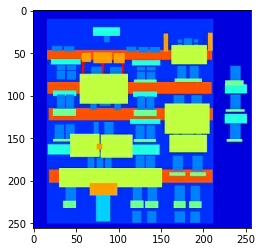

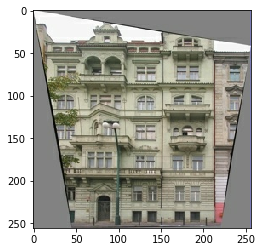

In [4]:
PATH = './Dataset/facades/'

BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
    
    w = tf.shape(image)[1]

    w = w // 2
    real_image = image[:, :w, :]
    input_image = image[:, w:, :]

    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

inp, re = load(PATH+'train/100.jpg')

# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)

#### Data preprocessing
데이터 전처리 과정이다.  
**1. Image Resize**  
Image의 Size를 원하는 크기로 바꾸는 작업이다.  
<code>tf.image.resize()</code>를 사용한다.  
- image: Input Image
- size: Resize할 Image의 width, height
- method: Image Resize할 방법 Image를 Upsampling 할 시 주어지지 않는 Pixel값을 처리할 방법이다. bilinear, lanczos3, nearest ... 등이 존재한다.

참조 <a href="https://www.tensorflow.org/api_docs/python/tf/image/resize?version=stable">tf.image.resize 사용방법</a><br>

**2. Image Random Crop**  
Image를 Random하게 일정 부분을 원하는 크기로 자르는 작업이다.  
<code>tf.image.random_crop()</code>를 사용한다.  
- image: Input Image
- size: [2,h,w,3] => 3 Channel RGB Color Image를 h,w크그로 자르는데 2개의 Dimension으로서 자르겠다. 즉, tf.stack()으로 input + real 로 합쳤기 때문에 이러한 과정이 필요하다.

참조 <a href="https://www.tensorflow.org/api_docs/python/tf/image/random_crop?version=stable">tf.random_crop 사용방법</a><br>

**3. Normalization**  
Image의 pixel값은 0 ~ 255 이므로 -1 ~ 1 의 값으로 Normalization하는 작업<br>

**4. Image Flip**  
Image를 Random하게 좌우 반전시키는 작업이다.  
<code>tf.image.flip_left_right()</code>를 사용한다.  
참조 <a href="https://www.tensorflow.org/api_docs/python/tf/image/flip_left_right?version=stable">tf.image.flip_left_right 사용방법</a><br>

**<span style="color:red">@tf.function()</span>**  
Tensorflow 2.0에서 지원하는 새로운 기능입니다.  
tf.function을 사용하면 파이썬 문법의 일부를 이식 가능하고 높은 성능의 텐서플로 그래프 코드로 변환시킨다.  
따라서 그래프 내에서 컴파일 되었을때는 더 빠르게 실행되고, CPU나 TPU를 사용해서 작동하고, 세이브 모델(SavedModel)로 내보내는 것도 가능하다.  
참조 <a href="https://www.tensorflow.org/guide/function?hl=ko">tf.tufncion Guide</a><br>

**참고사항**  
아래 Code에서 random_jitter() Function에서 Error 발생시 아래 Code 실행  
```code
!pip3 install -U gast==0.2.2
```
<br>
gast가 3.0.0 이상을 사용하게 되었을 경우 Tensroflow Num constant가 없어져서 발생하는 문제

참조: <a href="https://eehoeskrap.tistory.com/363">꾸준히 블로그</a><br>
참조: <a href="https://github.com/tensorflow/tensorflow/issues/32448">Stack Overflow</a>

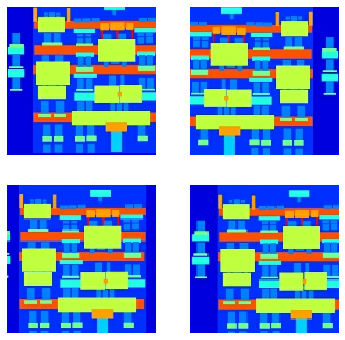

In [5]:
def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    return input_image, real_image

def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])
    
    return cropped_image[0], cropped_image[1]

# normalizing the images to [-1, 1]
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1
    
    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # resizing to 286 x 286 x 3
    input_image, real_image = resize(input_image, real_image, 286, 286)
    # randomly cropping to 256 x 256 x 3
    input_image, real_image = random_crop(input_image, real_image)
    if tf.random.uniform(()) > 0.5:
        # random mirroring
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)
        
    return input_image, real_image

# Data Preprocessing 결과 확인
plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re = random_jitter(inp, re)
    plt.subplot(2, 2, i+1)
    plt.imshow(rj_inp/255.0)
    plt.axis('off')
plt.show()

#### Load Data
위의 전처리 과정을 통하여 실제 Model에 집어 넣은 Dataset 준비

In [6]:
def load_image_train(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    
    return input_image, real_image

def load_image_test(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
    input_image, real_image = normalize(input_image, real_image)
    
    return input_image, real_image

#### Input Pipeline
Dataset을 읽고 위에서 선언한 전처리 과정을 거친 뒤 batch로서 작업까지하는 Input Pipeline을 구축하는 작업이다.  
중요한 것은 Tensorflow 에서 제공하는<a href="https://www.tensorflow.org/api_docs/python/tf/data/Dataset?version=stable">tf.data.Dataset</a>으로서 Pipeline을 구성하였다는 것 이다.  

- <code>list_files(file_pattern,shuffle=None,seed=None)</code>: 특정 Path에서 File을 가져오는 작업, file_pattern은 String으로서 선언할 수 있다.
- <code>map(map_func,num_parallel_calls=None)</code>: Dataset의 각각의 element에 선언한 Function을 적용할 수 있다. num_parallel_calls는 Dataset에 Function을 적용할 때 사용할 CPU를 동적으로 사용해서 더 빠르게 작동시키거나 병렬로 처리할지 정할 수 있다.
- <code>shuffle(buffer_size,seed=None, reshuffle_each_iteration=Non)</code>: Dataset을 Shuffle할 수 있는 작업이다. buffer_size만큼의 Dataset을 Shuffle하기 때문에 Buffer의 Size는 Dataset의 Size보다 같거나 더 커야 한다. (참고로 TrainDataset의 개수는 400개 이므로 <code>BUFFER_SIZE = 400</code>으로 선언하였다.)
- <code>batch(batch_size, drop_remainder=False)</code>: Dataset을 원하는 Batch_size로서 변경한다.



In [7]:
train_dataset = tf.data.Dataset.list_files(PATH+'train/*.jpg')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.list_files(PATH+'test/*.jpg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

#### Build the Generator
GAN에서 Generator를 선언하는 부분이다.  
해당 논문을 참조한 그대로의 Generator를 선언하며 다음과 같은 구조로서 구성되어 있다.
- Generator의 Architecture는 U-Net을 사용한다(skip connection)
- Encoder는 Conv -> Batchnorm -> Leaky ReLU 로서 구성된다.
- Decoder는 DeConv -> Batchnorm -> Dropout(applied to first 3 blocks) -> ReLU로 구성된다.

아래 Function을 살펴보면 다음과 같은 구조로서 되어있다.  
- downsample(): Generator의 Encoder Layer를 선언
- upsample(): Generator의 Decoder Layer를 선언
- Generator(): Encoder + Decoder + Skip Connection으로서 U-net 구성

위의 3개의 Function 중 downsample()과 upsample()은 Convolution Layer, Deconvolution Layer와 비슷하다.  
중요한 것은 이러한 downsample()과 upsample()을 사용하여 어떻게 Skip connection 구조의 U-Net을 구성하였는지 이다.  
아래 Code로서 현재 Skip Connection구조의 U-Net을 간단하게 구현하였다.  
```code
    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)
```
<br>
Code를 살펴보게 되면 Encoder의 Layer를 skip에 전부 담게 된다.  
이러한 skip을 Reverse하여 Layer의 순서를 뒤집는다.  
마지막으로 <code>tf.keras.layers.Concatenate()([x, skip])</code>를 반복하여 Decoder의 Input으로 Encoder Output + Decoder Output을 넣게 되어 Skip Connection구조의 U-Net을 구성하였다.

(1, 128, 128, 3)
(1, 256, 256, 3)


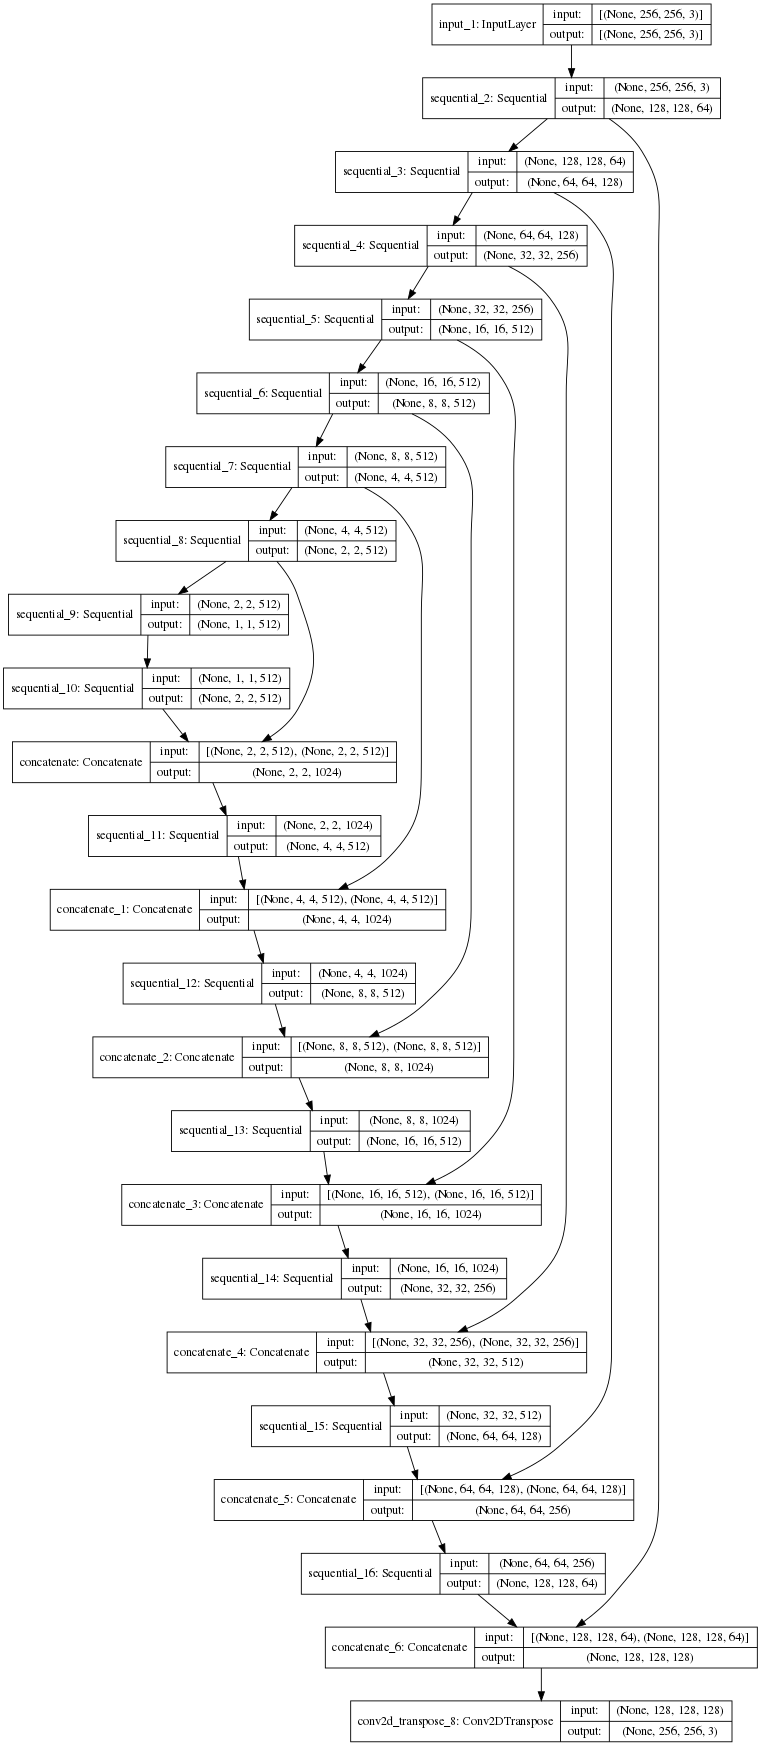

In [8]:
OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                               kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    
    result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False))

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

def Generator():
    inputs = tf.keras.layers.Input(shape=[256,256,3])
    
    down_stack = [
        downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
        downsample(128, 4), # (bs, 64, 64, 128)
        downsample(256, 4), # (bs, 32, 32, 256)
        downsample(512, 4), # (bs, 16, 16, 512)
        downsample(512, 4), # (bs, 8, 8, 512)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(512, 4), # (bs, 2, 2, 512)
        downsample(512, 4), # (bs, 1, 1, 512)
    ]
    
    up_stack = [
        upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
        upsample(512, 4), # (bs, 16, 16, 1024)
        upsample(256, 4), # (bs, 32, 32, 512)
        upsample(128, 4), # (bs, 64, 64, 256)
        upsample(64, 4), # (bs, 128, 128, 128)
    ]
    
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh') # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

#### Check not Training Generator
생성한 Generator가 실제로 작동하는지 살펴보는 예제이다.  
현재 Generator는 Batch_size로 들어가므로 <code>inp[tf.newaxis,...]</code>로서 차원을 늘려 Input으로 넣고 <code>training=False</code>의 Option을 설정하므로서 Training되지 않은 결과를 확인할 수 있다.  
Output 또한 Batch_size로서 나오게 되므로 <code>gen_output[0,...]</code>로서 최종적인 Generator의 결과를 확인할 수 있다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


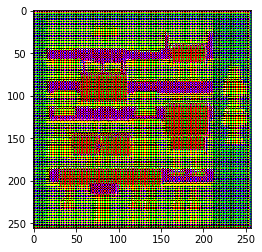

In [9]:
gen_output = generator(inp[tf.newaxis,...], training=False)
plt.imshow(gen_output[0,...])

#### Generator Loss
위에서 선언한 LossFunction을 살펴보면 다음과 같다.  
<p>$$G^{*} = \text{arg } \underset{G}{min} \underset{D}{max} L_{cGAN}(G,D) + \lambda L_{L1}(G)$$</p>
<p>$$ = \text{arg } \underset{G}{min} \underset{D}{max} \mathbb{E}_{x,y}[logD(x,y)] + \mathbb{E}_{x,z}[log(1 - D(x,G(x,z)))] + \lambda L_{L1}(G)$$</p><br>

위의 식에서 Generator에 관련된 Loss부분만 추출하면 다음과 같다.  
<p>$$ Loss_{Generator}= \underset{G}{min} \mathbb{E}_{x,y}[logD(x,y)] + \mathbb{E}_{x,z}[log(1 - D(x,G(x,z)))] + \lambda L_{L1}(G)$$</p>
<p>$$ = \underset{G}{min} \mathbb{E}_{x,z}[log(1 - D(x,G(x,z)))] + \lambda L_{L1}(G)$$</p><br>

생각을 해보면 최종적인 Generator의 목적은 Discriminator에서 1 이라고 판단하는 것 이기 때문에 위의 식을 아래처럼 변경할 수 있다.  
<p>$$ Loss_{Generator} = \underset{G}{max} \mathbb{E}_{x,z}[log(D(x,G(x,z)))] + \lambda L_{L1}(G)$$</p><br>

아래에서 LossFunction에 관한 Code와 관련하면 다음과 같다.  
<br>

**<span>$\mathbb{E}_{x,z}[log(D(x,G(x,z)))]$</span>**  
밑의 Code에서 <code>loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)</code>로서 선언하였다.  
따라서 <code>gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)</code>를 식에서 적용하면  
- <code>disc_generated_output</code>: <span>$log(D(x,G(x,z)))$</span>
- <code>tf.ones_like(disc_generated_output)</code>: Generator에서 생성된 값을 1이라고 Discriminator에서 판단하게 하고 싶음

<br>

**<span>$\lambda L_{L1}(G)$</span>**  
- <code>LAMBDA = 100</code>: <span>$\lambda$</span>
- <code>l1_loss = tf.reduce_mean(tf.abs(target - gen_output))</code>: <span>$\mathbb{E}_{x,y,z}[||y-G(x,z)||_1]$</span>
 - <code>target</code>: y
 - <code>gen_output</code>: <span>$G(x,z)$</span>
 
위와 같은 과정을 그림으로 나타내면 다음과 같다.  
<img src="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gen.png?raw=1"><br>
사진 참조: <a href="https://www.tensorflow.org/tutorials/generative/pix2pix">Tensorflow2.0 pix2pix</a><br>

In [10]:
LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

#### Build the Discriminator
GAN에서 Discriminator 선언하는 부분이다.  
해당 논문을 참조한 그대로의 Discriminator를 선언하며 다음과 같은 구조로서 구성되어 있다.
- PatchGAN을 사용한다. 최종적인 Output은 1 x 1 로서 Crossentropy를 사용하여 1(Target Image) or 0(Generator Image)로서 판단하는 것이 아닌 Input Image + Target Image or Generator Image를 30 x 30의 Pixel로서 줄여서 각각의 Patch에 대해서 1 or 0 으로서 판단하게 된다.
- 각 Block은 Conv -> Batchnorm -> Leaky ReLU로서 구성된다.
- Input Image + Target Image or Generator Image은 <code>tf.keras.layers.concatenate()</code>로서 구성한다.



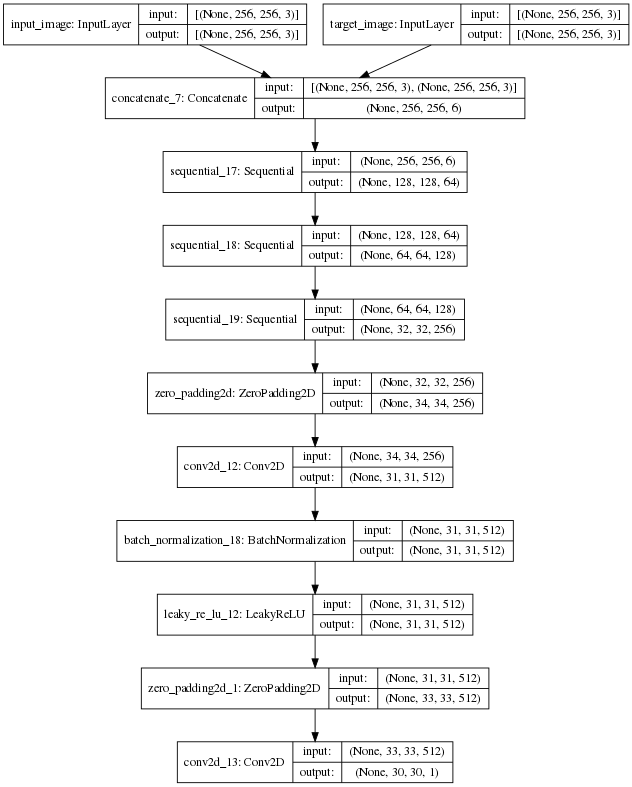

In [11]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

    x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

#### Check not Training Discriminator

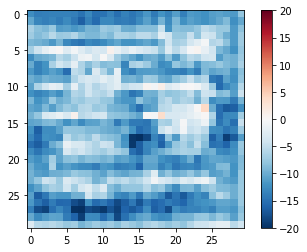

In [11]:
disc_out = discriminator([inp[tf.newaxis,...], gen_output], training=False)
plt.imshow(disc_out[0,...,-1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

#### Discriminator Loss
위에서 선언한 LossFunction을 살펴보면 다음과 같다.  
<p>$$G^{*} = \text{arg } \underset{G}{min} \underset{D}{max} L_{cGAN}(G,D) + \lambda L_{L1}(G)$$</p>
<p>$$ = \text{arg } \underset{G}{min} \underset{D}{max} \mathbb{E}_{x,y}[logD(x,y)] + \mathbb{E}_{x,z}[log(1 - D(x,G(x,z)))] + \lambda L_{L1}(G)$$</p><br>

위의 식에서 Discriminator에 관련된 Loss부분만 추출하면 다음과 같다.  
<p>$$ Loss_{Discriminator}= \underset{D}{max} \mathbb{E}_{x,y}[logD(x,y)]$$</p>

아래에서 LossFunction에 관한 Code와 관련하면 다음과 같다.  
<br>

**<span>$\mathbb{E}_{x,y}[logD(x,y)]$</span>**  
아래 Code에서 <span>$D(x,y)$</span> = <code>disc_real_output</code> or <code>disc_generated_output</code>이다 즉, Discriminator가 Generator Image or Target Image를 입력으로 받아서 1 or 0으로서 판단하는 것 이다.  
또한 실제 Target Image는 1로서 판단하고, Generator Image는 0으로서 판단하여 최종적인 Loss를 구성하게 된다.

위와 같은 과정을 그림으로 나타내면 다음과 같다.  
<img src="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/dis.png?raw=1"><br>
사진 참조: <a href="https://www.tensorflow.org/tutorials/generative/pix2pix">Tensorflow2.0 pix2pix</a><br>

In [12]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

#### Define the Optimizers and Checkpointsaver
Generator와 Discriminator의 Backpropagation을 각각 다르게 수행해야 하므로 Optimizer를 2개로서 나누어서 선언하고 Model의 중간 과정을 저장하기 위한 Checkpointsaver를 선언한다.

In [16]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './my_log_dir/pix2pix'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

#### Generate Image
실제 Training된 Model과 Test_Image, Target_Image를 넣어서 각각의결과에 대해서 표시하는 작업이다.

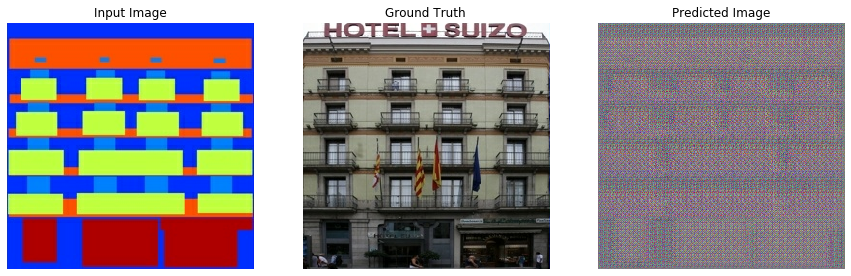

In [15]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15,15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()
    
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

#### Training
아래 Code를 살펴보게 되면 핵식임 Function은 <code>train_step()</code>이다.  
위에서 설명한 것과 같이 Tensorflow2.0 문법에 맞게 <code>@tf.function</code>으로서 Decorator를 추가하여 Function을 작성하였다.  

아래 Function에서는 <code>tf.GradientTape()</code>을 사용하였다.  
**<code>tf.GradientTape()</code>** 이란 자동으로 미분을 적용하기 위하여 선언하였다.  

**gradient**  
<code>gradient(target, sources,output_gradients=None, unconnected_gradients=tf.UnconnectedGradients.NONE)</code>: 실질적으로 미분을 계산하게 된다. 위에서 선언한 Gradient의 미분을 적용하게 된다.  
- target: 미분을 진행할 Tensor
- source: Target의 각각의 Element

<br>

**apply_gradient**  
<code>apply_gradients(grads_and_vars, name=None)</code>: Hyperparameter를 Update한다.<br>

참조: <a href="https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable">GradientTape</a><br>
참조: <a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer?version=stable">apply_gradient</a><br>

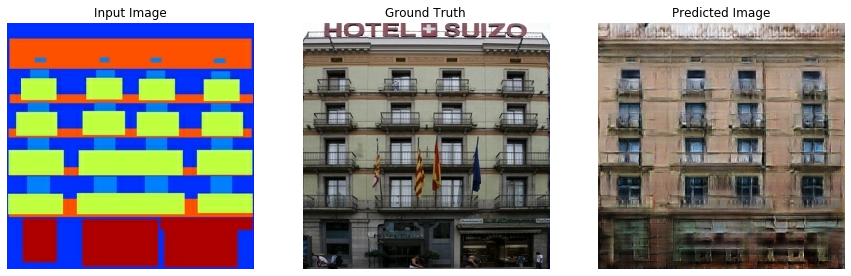

Epoch:  149
................................................................................................................................................................................................................................................................................................................................................................................................................
Time taken for epoch 150 is 218.38614678382874 sec



In [18]:
EPOCHS = 150

import datetime
log_dir="./my_log_dir/pix2pix/log/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)
        
        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)
        
    generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))
    
    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
        tf.summary.scalar('disc_loss', disc_loss, step=epoch)
        
def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        start = time.time()
        
        display.clear_output(wait=True)
        
        for example_input, example_target in test_ds.take(1):
            generate_images(generator, example_input, example_target)
            
        print("Epoch: ", epoch)
        
        # Train
        for n, (input_image, target) in train_ds.enumerate():
            print('.', end='')
            if (n+1) % 100 == 0:
                print()
            train_step(input_image, target, epoch)
        print()
        
        # saving (checkpoint) the model every 20 epochs
        if (epoch + 1) % 20 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
            
        print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
        
    checkpoint.save(file_prefix = checkpoint_prefix)
    
fit(train_dataset, EPOCHS, test_dataset)

#### Training Model Check
위에서 선언한 <code>generate_image()</code>로서 결과를 확인한다.

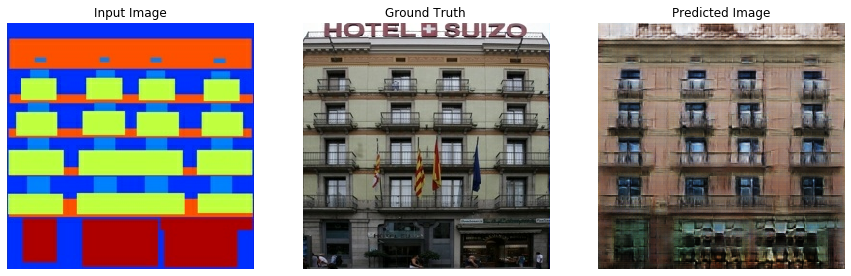

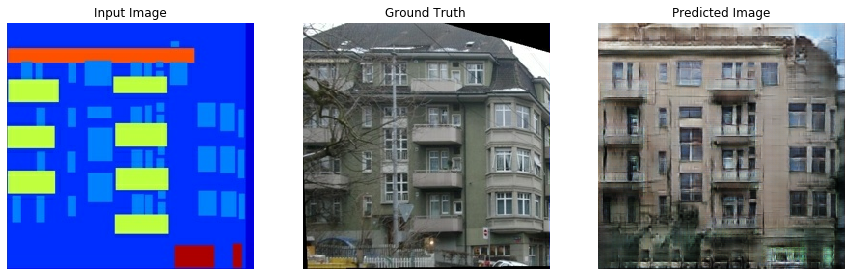

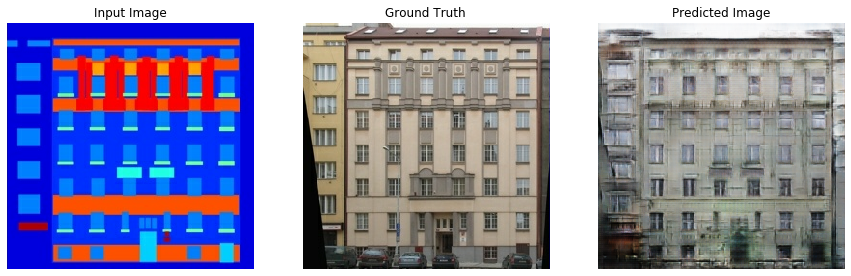

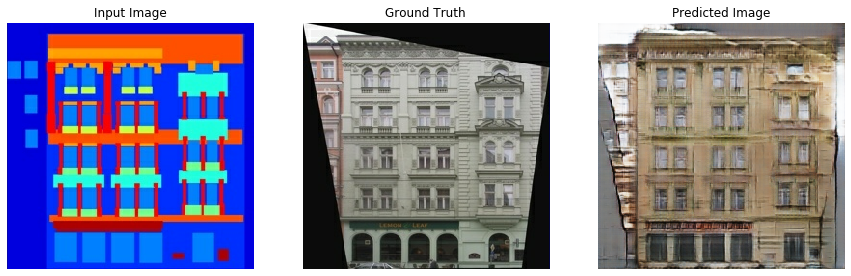

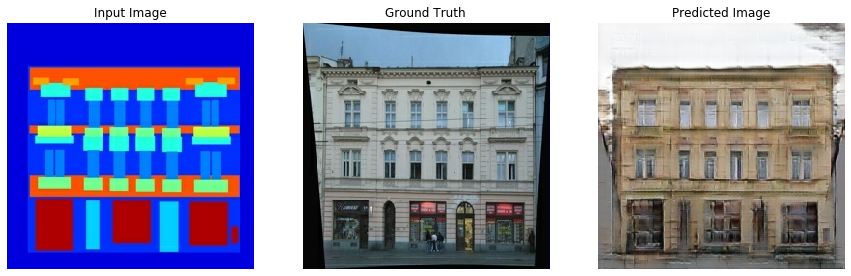

In [19]:
# Run the trained model on a few examples from the test dataset
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)